<a href="https://colab.research.google.com/github/lakshayanand96/Perceptron_ANDGate/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap


In [7]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)

In [8]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    
    y = df[target_col]
    
    return X, y 

In [9]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [10]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model = Perceptron(eta=ETA, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()

initial weights before training: 
[-4.98984005e-05 -6.35871178e-05 -5.01235450e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 1 0]
error: 
0   -1
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-4.98984005e-05  2.99936413e-01  2.99949876e-01]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 2.99950102e-01  5.99936413e-01 -5.01235450e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-4.98984005e-05  2.99936413e-01  8.99949876e-01]
####################
--------------------
for epoch >>

In [11]:
model.predict(X)

array([0, 0, 0, 1])

In [12]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  joblib.dump(model, filePath)

In [13]:
save_model(model,"and_model")

In [14]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  plotPath = os.path.join(plot_dir, file_name) # model/filename
  plt.savefig(plotPath)

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


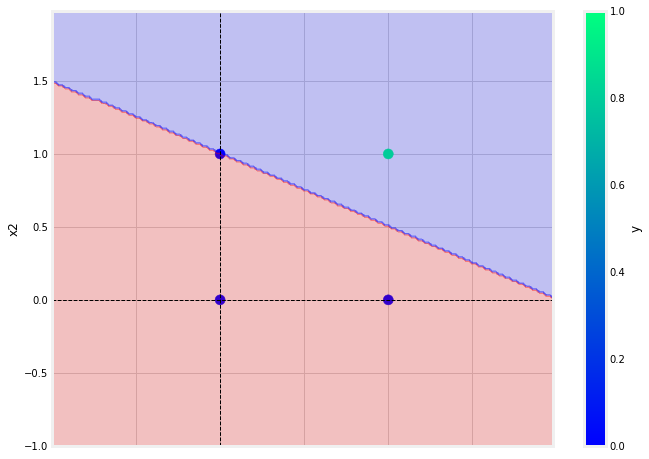

In [16]:
save_plot(df,"and.png", model)